# Proyecto de análisis de datos para comprender las cancelaciones de hoteles


# Preprocesamiento de datos

In [3]:
import numpy as np
import pandas as pd
from google.colab import files

In [4]:
# Cargamos los datos de los archivos .csv para 2018, 2019 y 2020
# para tenerlos a la mano en la memoria temporal del servidor suministrado por Google Colab.
# Así no tenemos la necesidad de montar el google drive
uploaded = files.upload()

Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving 2020.csv to 2020.csv


In [15]:
# Leémos los archivos con pandas
data_2018 = pd.read_csv('2018.csv')
data_2019 = pd.read_csv('2019.csv')
data_2020 = pd.read_csv('2020.csv')

# Eliminar los espacios iniciales de los nombres de columnas
data_2020.columns = data_2020.columns.str.strip()

# Concatenamos los datos de los tres años en un DataFrame
hotel_data = pd.concat([data_2018, data_2019, data_2020])

In [32]:
# Manejo de valores faltantes
for i in hotel_data.columns:
  if hotel_data[i].isna().sum() != 0:
    print('null values in', i, 'column :', hotel_data[i].isna().sum())

In [33]:
hotel_data = hotel_data.dropna(subset=['children'])

In [ ]:
mode_country = hotel_data['country'].mode()[0]
hotel_data['country'].fillna(mode_country, inplace=True)

In [20]:
hotel_data = hotel_data.drop(columns=['company'])

In [ ]:
hotel_data['agent'].fillna(9, inplace=True)

In [13]:
# Cargamos los datos de los archivos "market_segment.csv" y "meal_cost.csv"
uploaded = files.upload()

Saving market_segment.csv to market_segment.csv
Saving meal_cost.csv to meal_cost.csv


In [22]:
market_segment_data = pd.read_csv('market_segment.csv')
meal_cost_data = pd.read_csv('meal_cost.csv')

In [23]:
meal_cost_data['Cost'] = meal_cost_data['Cost'].astype(str).str.strip()


In [24]:
# Eliminamos los espacios en blanco y convertir al mismo tipo de datos
hotel_data['market_segment'] = hotel_data['market_segment'].str.strip()
meal_cost_data['meal'] = meal_cost_data['meal'].str.strip()
meal_cost_data['Cost'] = meal_cost_data['Cost'].str.strip()

# Nos aseguramos de que la columna 'Costo' sea numérica (asumiendo que debería ser numérica)
meal_cost_data['Cost'] = pd.to_numeric(meal_cost_data['Cost'], errors='coerce')
# 'coerce' manejará cualquier valor no numérico

# Fusiona los DataFrames como lo has hecho
hotel_data = pd.merge(hotel_data, market_segment_data, on='market_segment', how='left')
hotel_data = pd.merge(hotel_data, meal_cost_data, on='meal', how='left')


In [25]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,240.0,0,Transient,82.0,0,1,Canceled,5/6/2018,0.30,12.99
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,15.0,0,Transient,105.5,0,0,Canceled,4/22/2018,0.30,17.99
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,240.0,0,Transient,123.0,0,0,Canceled,6/23/2018,0.30,12.99
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,240.0,0,Transient,107.0,0,2,Canceled,5/11/2018,0.30,12.99
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,9.0,0,Transient,108.3,0,2,Canceled,5/29/2018,0.10,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141934,City Hotel,1,1,2020,February,5,1,0,0,1,...,9.0,0,Transient,0.0,0,1,No-Show,2/1/2020,0.20,12.99
141935,City Hotel,1,31,2020,July,29,16,2,0,1,...,9.0,0,Transient,135.0,0,2,No-Show,7/16/2020,0.10,12.99
141936,City Hotel,1,25,2020,May,18,6,2,1,1,...,9.0,0,Transient,125.0,0,0,No-Show,5/6/2020,0.15,12.99
141937,City Hotel,1,6,2020,July,29,17,1,0,1,...,9.0,0,Transient,65.0,0,0,No-Show,7/17/2020,0.15,12.99


In [26]:
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])
discrepancies = hotel_data[hotel_data['reservation_status_date'].dt.year != hotel_data['arrival_date_year']]

In [27]:
discrepancies

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
566,Resort Hotel,1,297,2018,September,36,3,1,3,2,...,240.0,0,Transient,0.00,0,0,Canceled,2014-11-18,0.1,12.99
4211,City Hotel,1,265,2018,July,28,9,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
4212,City Hotel,1,258,2018,July,27,2,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
4213,City Hotel,1,258,2018,July,27,2,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
4214,City Hotel,1,258,2018,July,27,2,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116412,City Hotel,1,301,2020,August,34,24,1,3,2,...,9.0,0,Transient,116.10,0,2,Canceled,2019-12-02,0.3,12.99
116518,City Hotel,1,279,2020,August,35,28,1,1,2,...,9.0,0,Transient,107.10,0,0,Canceled,2019-12-29,0.3,12.99
116533,City Hotel,1,321,2020,August,35,28,1,4,2,...,9.0,0,Transient,145.08,0,3,Canceled,2019-12-24,0.3,17.99
116613,City Hotel,1,52,2020,January,1,6,2,2,2,...,9.0,0,Transient,88.40,0,2,Canceled,2019-12-22,0.3,12.99


In [28]:
expected_years = [2018, 2019, 2020]

# Filtramos las filas con discrepancias anormales y conservar solo aquellas con años esperados
hotel_data = hotel_data[hotel_data['reservation_status_date'].dt.year.isin(expected_years)]

In [29]:
hotel_data.duplicated().sum()

40883

In [30]:
hotel_data = hotel_data.drop_duplicates()

In [31]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,240.0,0,Transient,82.0,0,1,Canceled,2018-05-06,0.30,12.99
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,15.0,0,Transient,105.5,0,0,Canceled,2018-04-22,0.30,17.99
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,240.0,0,Transient,123.0,0,0,Canceled,2018-06-23,0.30,12.99
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,240.0,0,Transient,107.0,0,2,Canceled,2018-05-11,0.30,12.99
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,9.0,0,Transient,108.3,0,2,Canceled,2018-05-29,0.10,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141934,City Hotel,1,1,2020,February,5,1,0,0,1,...,9.0,0,Transient,0.0,0,1,No-Show,2020-02-01,0.20,12.99
141935,City Hotel,1,31,2020,July,29,16,2,0,1,...,9.0,0,Transient,135.0,0,2,No-Show,2020-07-16,0.10,12.99
141936,City Hotel,1,25,2020,May,18,6,2,1,1,...,9.0,0,Transient,125.0,0,0,No-Show,2020-05-06,0.15,12.99
141937,City Hotel,1,6,2020,July,29,17,1,0,1,...,9.0,0,Transient,65.0,0,0,No-Show,2020-07-17,0.15,12.99


# Análisis exploratorio de datos





In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Agrupamos los datos por año y mes y calculamos las tasas de cancelación mensuales
monthly_cancelation_rates = hotel_data.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].mean().reset_index()

# Ordene los datos por año y mes para una representación gráfica adecuada.
monthly_cancelation_rates = monthly_cancelation_rates.sort_values(by=['arrival_date_year', 'arrival_date_month'])


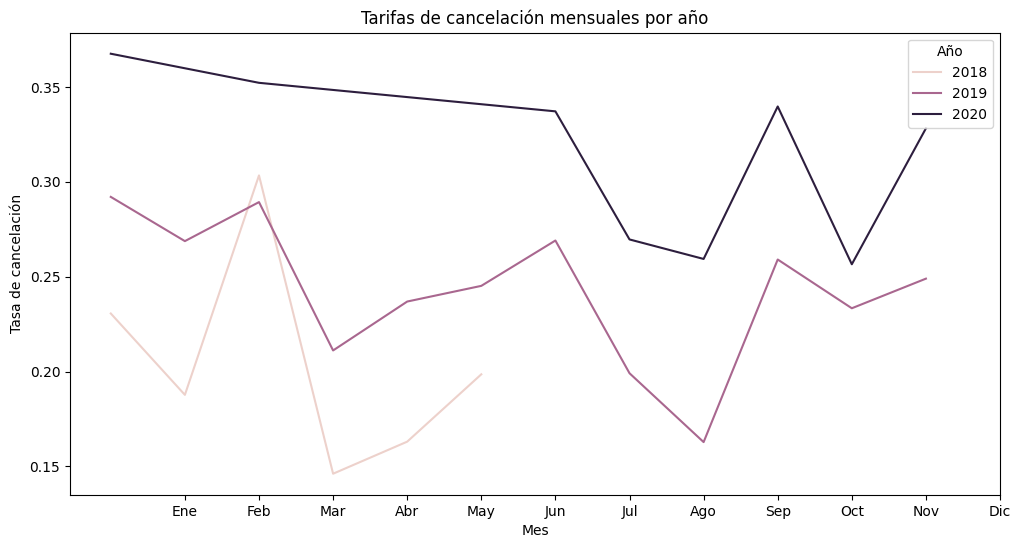

In [40]:
# Crear un gráfico de series temporales para cada año
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_cancelation_rates, x='arrival_date_month', y='is_canceled', hue='arrival_date_year')
plt.title('Tarifas de cancelación mensuales por año')
plt.xlabel('Mes')
plt.ylabel('Tasa de cancelación')
plt.xticks(range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Año')
plt.show()


<ipython-input-41-daebfd475a65>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reservation_lead_time, x='reservation_status', y='lead_time', palette='YlGnBu')


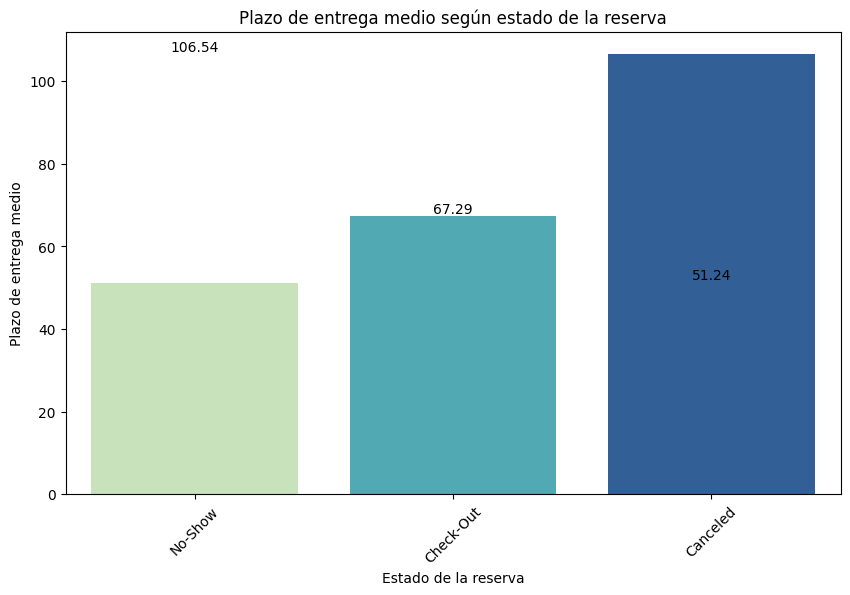

In [41]:
# Agrupamos los datos por estado de reserva y calcule el tiempo de entrega promedio
reservation_lead_time = hotel_data.groupby('reservation_status')['lead_time'].mean().reset_index()

# Ordenamos los datos para representarlos gráficamente
reservation_lead_time = reservation_lead_time.sort_values(by='lead_time')

# Creamos un barplot con etiquetas
plt.figure(figsize=(10, 6))
sns.barplot(data=reservation_lead_time, x='reservation_status', y='lead_time', palette='YlGnBu')
plt.title('Plazo de entrega medio según estado de la reserva')
plt.xlabel('Estado de la reserva')
plt.ylabel('Plazo de entrega medio')

# Añadimos etiquetas de datos a las barras
for index, row in reservation_lead_time.iterrows():
    plt.text(index, row['lead_time'], f'{row["lead_time"]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()



<ipython-input-42-a54762df1a8b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=market_segment_cancellation_rate, x='market_segment', y='is_canceled', palette='YlGnBu')


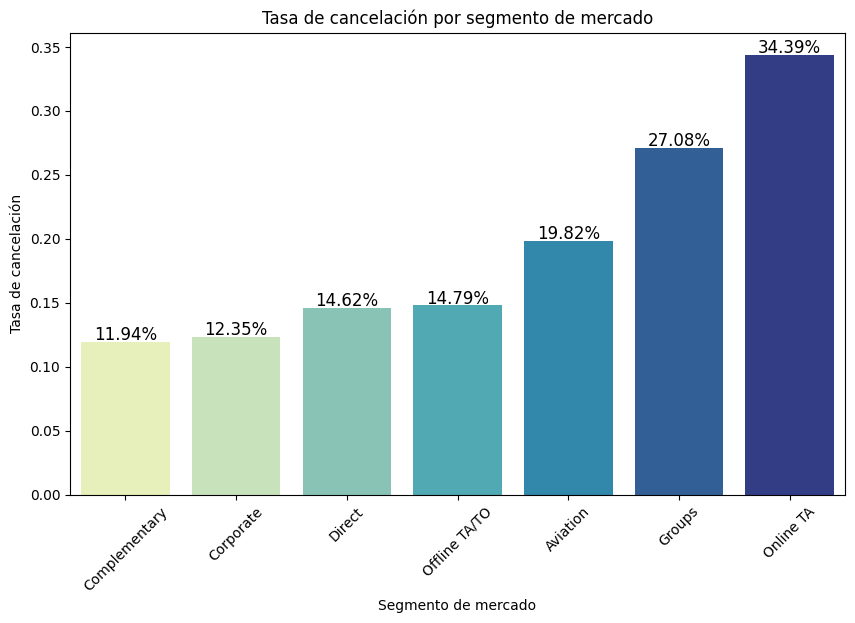

In [42]:

# Agrupamos los datos por segmento de mercado y calcule la tasa de cancelación
market_segment_cancellation_rate = hotel_data.groupby('market_segment')['is_canceled'].mean().reset_index()

# Ordenamos los datos para representarlos gráficamente
market_segment_cancellation_rate = market_segment_cancellation_rate.sort_values(by='is_canceled')

# Creamos un gráfico de barras para las tasas de cancelación del segmento de mercado con la paleta de colores 'YlGnBu'
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=market_segment_cancellation_rate, x='market_segment', y='is_canceled', palette='YlGnBu')

# Add data labels to the chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Tasa de cancelación por segmento de mercado')
plt.xlabel('Segmento de mercado')
plt.ylabel('Tasa de cancelación')
plt.xticks(rotation=45)
plt.show()




<ipython-input-43-6aca03d5e974>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=distribution_channel_cancellation_rate, x='distribution_channel', y='is_canceled', palette='YlGnBu')


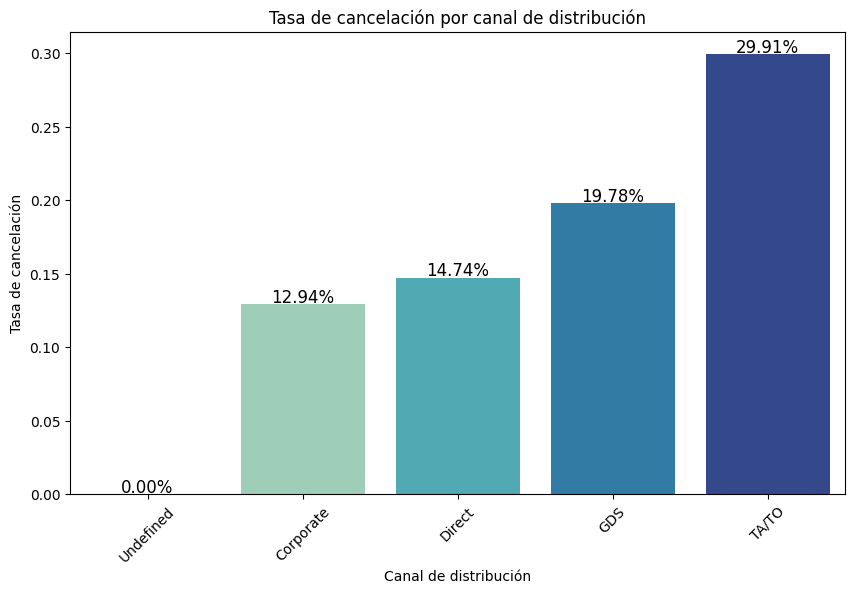

In [43]:
# Agrupamos los datos por canal de distribución y calcule la tasa de cancelación
distribution_channel_cancellation_rate = hotel_data.groupby('distribution_channel')['is_canceled'].mean().reset_index()

# Ordenamos los datos
distribution_channel_cancellation_rate = distribution_channel_cancellation_rate.sort_values(by='is_canceled')

# Crear un gráfico de barras para las tasas de cancelación del canal de distribución
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=distribution_channel_cancellation_rate, x='distribution_channel', y='is_canceled', palette='YlGnBu')

# Agregamos las etiquetas de datos al gráfico
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Tasa de cancelación por canal de distribución')
plt.xlabel('Canal de distribución')
plt.ylabel('Tasa de cancelación')
plt.xticks(rotation=45)
plt.show()



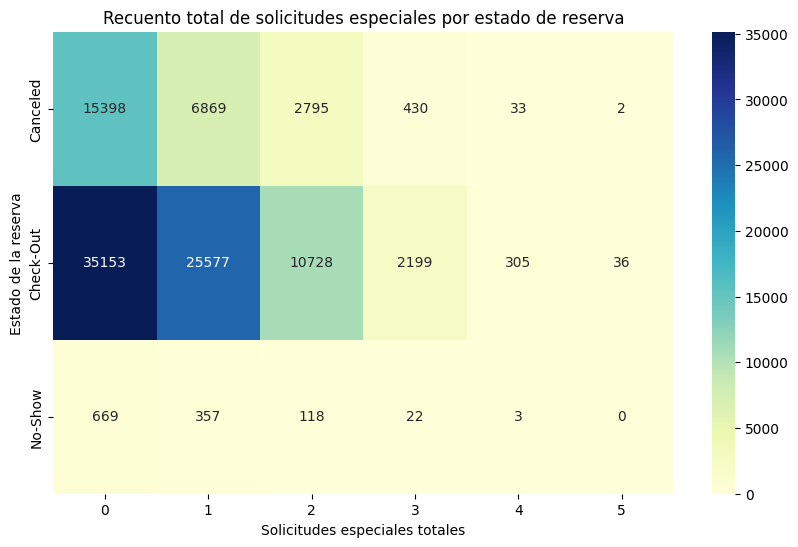

In [45]:
# Creamos una tabla dinámica con 'reservation_status' y 'total_of_special_requests' como índices
pivot_table = hotel_data.pivot_table(index='reservation_status', columns='total_of_special_requests', aggfunc='size', fill_value=0)

# Crea un mapa de calor usando un esquema de colores
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Recuento total de solicitudes especiales por estado de reserva')
plt.xlabel('Solicitudes especiales totales')
plt.ylabel('Estado de la reserva')
plt.show()


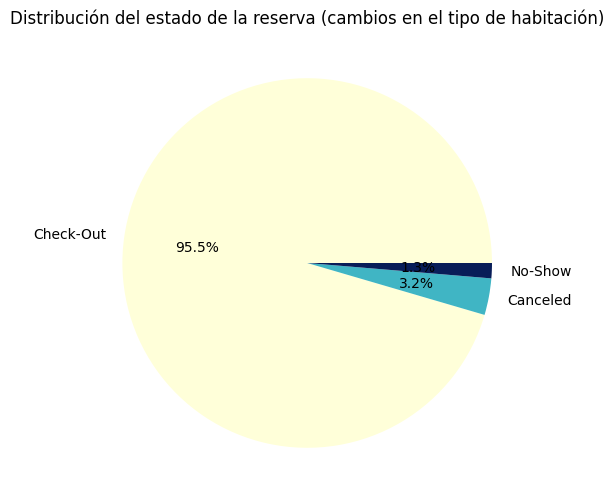

In [47]:
# Filtramos filas donde 'reserved_room_type' y 'assigned_room_type' no son similares
room_type_changes = hotel_data[hotel_data['reserved_room_type'] != hotel_data['assigned_room_type']]

# Cuenta las ocurrencias de cada 'reservation_status' cuando 'reserved_room_type' y 'assigned_room_type' no son similares
reservation_status_counts = room_type_changes['reservation_status'].value_counts(normalize=True)

# Define la paleta de colores 'YlGnBu'
colors = plt.cm.YlGnBu(np.linspace(0, 1, len(reservation_status_counts)))

# Crea un gráfico circular con la paleta de colores 'YlGnBu'
plt.figure(figsize=(8, 6))
plt.pie(reservation_status_counts, labels=reservation_status_counts.index, autopct=lambda p: f'{p:.1f}%', colors=colors)
plt.title("Distribución del estado de la reserva (cambios en el tipo de habitación)")
plt.show()


# Modelado predictivo

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Seleccionamos las columnas de interés
selected_columns = ['lead_time', 'arrival_date_month', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'is_canceled']

# Se Crea un subconjunto de los datos con las columnas seleccionadas
subset_data = hotel_data[selected_columns]

# Codificar variables categóricas
label_encoder = LabelEncoder()
categorical_columns = ['arrival_date_month', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
for col in categorical_columns:
    subset_data[col] = label_encoder.fit_transform(subset_data[col])

# Dividimos los datos en características (X) y la variable objetivo (y)
X = subset_data.drop(columns='is_canceled')
y = subset_data['is_canceled']

# Spliteamos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos y se ajusta el modelo de bosque aleatorio
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = model.predict(X_test)

# Se evalua el modelo
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))
print("Exactitud (accuracy):", accuracy_score(y_test, y_pred))

# Obtenemos las características importantes
feature_importance = model.feature_importances_
feature_names = X.columns
sorted_feature_importance = dict(sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True))

print("\nImportancia de las características (Top 10):")
for feature, importance in list(sorted_feature_importance.items())[:10]:
    print(f"{feature}: {importance:.4f}")


<ipython-input-49-04f454e26b99>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data[col] = label_encoder.fit_transform(subset_data[col])
<ipython-input-49-04f454e26b99>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data[col] = label_encoder.fit_transform(subset_data[col])
<ipython-input-49-04f454e26b99>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat


Informe de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     14809
           1       0.61      0.52      0.56      5330

    accuracy                           0.78     20139
   macro avg       0.72      0.70      0.71     20139
weighted avg       0.77      0.78      0.78     20139

Exactitud (accuracy): 0.7833556780376384

Importancia de las características (Top 10):
lead_time: 0.5270
country: 0.1895
arrival_date_month: 0.0959
market_segment: 0.0690
reserved_room_type: 0.0468
customer_type: 0.0305
deposit_type: 0.0267
distribution_channel: 0.0145
